In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


data = pd.read_csv('train.csv')
data.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
data['Deck'] = data.Cabin.str.split('/').str[0]
data['Number'] = data.Cabin.str.split('/').str[1]
data['Side'] = data.Cabin.str.split('/').str[2]

In [4]:
data
data['CryoSleep'] = data['CryoSleep']

In [5]:
data.isnull().sum()
data['Age'] = data['Age'].fillna(data['Age'].median())
data['CryoSleep'] = data['CryoSleep'].replace({True : 1, False : 0})
data['Transported'] = data['Transported'].replace({True : 1, False : 0})
data['VIP'] = data['VIP'].replace({True : 1, False : 0})
data['Side'] = data['Side'].replace({'P' : 1, 'S' : 0})
#data = data.drop(columns=['Cabin'])
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Number,Side
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,1.0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,0.0
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,0.0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,0.0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0.0,A/98/P,55 Cancri e,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,A,98,1.0
8689,9278_01,Earth,1.0,G/1499/S,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,1499,0.0
8690,9279_01,Earth,0.0,G/1500/S,TRAPPIST-1e,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,G,1500,0.0
8691,9280_01,Europa,0.0,E/608/S,55 Cancri e,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,E,608,0.0


In [6]:
dt = data.dtypes [data.dtypes == 'object']
for col in data:
    if col in dt:
        print(1)
    else:
        print(0)

1
1
0
1
1
0
0
0
0
0
0
0
1
0
1
1
0


In [7]:
data['Destination'].unique()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   float64
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8490 non-null   float64
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int64  
 14  Deck          8494 non-null   object 
 15  Number        8494 non-null   object 
 16  Side          8494 non-null   float64
dtypes: float64(9), int64(1), object(7)
memory usage: 1.1+ MB


In [8]:
from sklearn.preprocessing import LabelEncoder

categorial_features = ['HomePlanet', 'Destination', 'Deck']
encoder = LabelEncoder()

for feature in categorial_features:
    encoder.fit(data[feature])
    data[feature] = encoder.transform(data[feature])

data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Number,Side
0,0001_01,1,0.0,B/0/P,2,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,0,1.0
1,0002_01,0,0.0,F/0/S,2,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,5,0,0.0
2,0003_01,1,0.0,A/0/S,2,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0,0,0.0
3,0003_02,1,0.0,A/0/S,2,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0,0,0.0
4,0004_01,0,0.0,F/1/S,2,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,5,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0.0,A/98/P,0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,0,98,1.0
8689,9278_01,0,1.0,G/1499/S,1,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,6,1499,0.0
8690,9279_01,0,0.0,G/1500/S,2,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,6,1500,0.0
8691,9280_01,1,0.0,E/608/S,0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,4,608,0.0


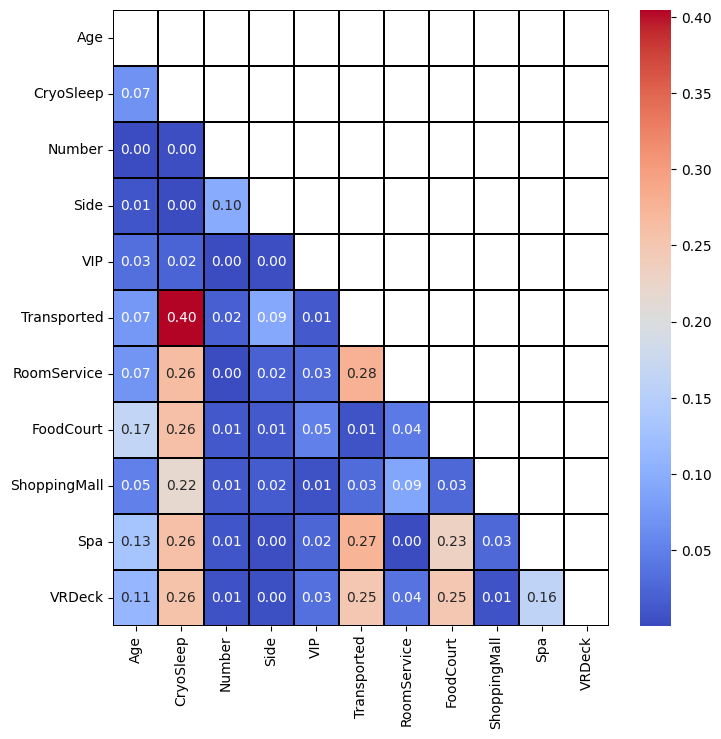

In [59]:
import seaborn as sns
import pandas as pd
 

df = pd.DataFrame(data[['Age', 'CryoSleep', 'Number', 'Side', 'VIP', 'Transported', 'RoomService', 'FoodCourt',	'ShoppingMall',	'Spa',	'VRDeck']])
#make a coorelation matrix with boolean mask
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_matrix = corr_matrix.mask(mask)

#plot a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1, linecolor='black')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = data[['Age', 'CryoSleep', 'Number', 'Side', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Destination']]
x = scaler.fit_transform(x)
y = data[['Transported']]
y = scaler.fit_transform(y)

y

array([[-1.00727366],
       [ 0.99277886],
       [-1.00727366],
       ...,
       [ 0.99277886],
       [-1.00727366],
       [ 0.99277886]])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

c:\Users\Margarita\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: (array([-1.00727366,  0.99277886]),)